In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

In [14]:
df = pd.read_csv('C:/Users/udayas/Unified Mentor Data Analyst Internship/Beginner Projects/E-commerce Furniture Dataset 2024/ecommerce_furniture_dataset_2024.csv')

In [16]:
df.head()

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.40,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping


In [18]:
df.isnull().sum()

productTitle        0
originalPrice    1513
price               0
sold                0
tagText             3
dtype: int64

In [20]:
df.shape

(2000, 5)

In [22]:
df.drop(['originalPrice'],axis=1,inplace=True)

In [24]:
df.head()

,productTitle,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$21.37,1,Free shipping


In [26]:
df['tagText'].nunique()

100

In [28]:
df['tagText'].value_counts()

tagText
Free shipping           1880
+Shipping: $5.09           9
+Shipping: $239.64         2
+Shipping: $97.54          2
+Shipping: $64.56          2
                        ... 
+Shipping: $88.26          1
+Shipping: $170.31         1
+Shipping: $1,097.18       1
+Shipping: $106.13         1
+Shipping: $171.49         1
Name: count, Length: 100, dtype: int64

In [30]:
# Replace all values except 'Free shipping' and '+Shipping: $5.09' with 'others'
df['tagText'] = df['tagText'].apply(lambda x: x if x in ['Free shipping', '+Shipping: $5.09'] else 'others')

In [32]:
# Display the modified value counts
print(df['tagText'].value_counts())

tagText
Free shipping       1880
others               111
+Shipping: $5.09       9
Name: count, dtype: int64


<Axes: xlabel='tagText', ylabel='count'>

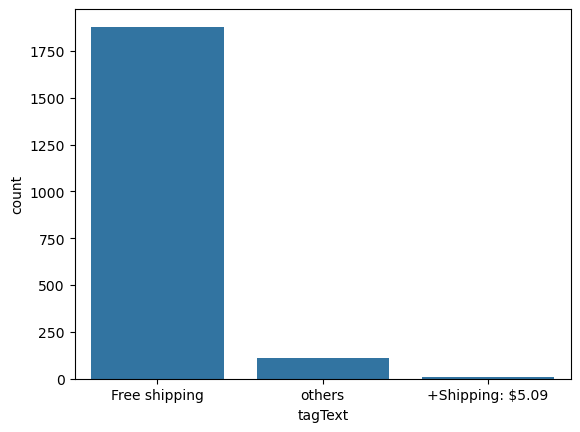

In [34]:
sns.countplot(x='tagText',data=df)

In [36]:
df['price'] = df['price'].replace(r'[$,]', '', regex=True).astype(float)

In [38]:
df.head()

,productTitle,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,21.37,1,Free shipping


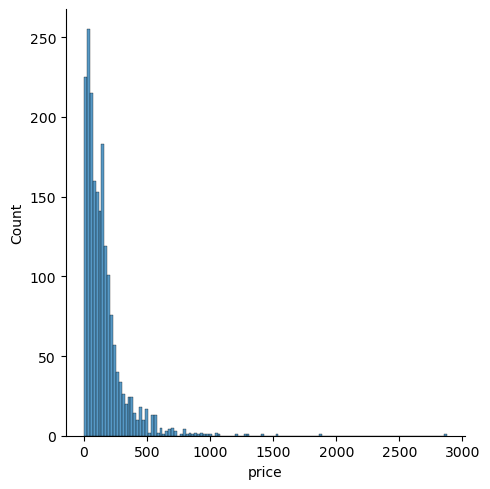

In [40]:
sns.displot(df['price'])

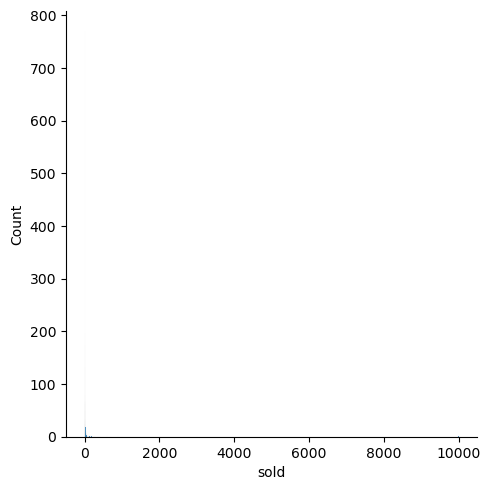

In [42]:
 sns.displot(df['sold'])

<Axes: xlabel='price', ylabel='sold'>

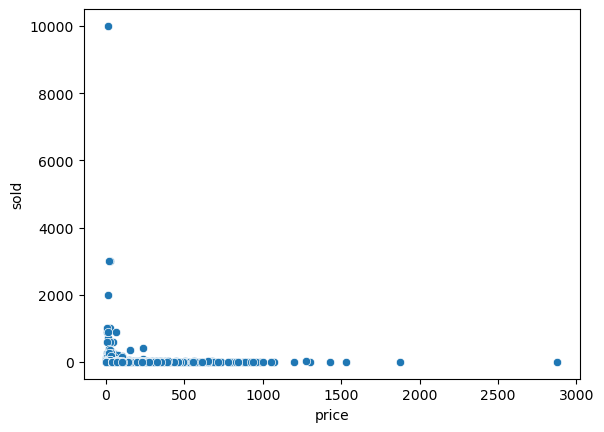

In [44]:
sns.scatterplot(x='price', y='sold', data=df)

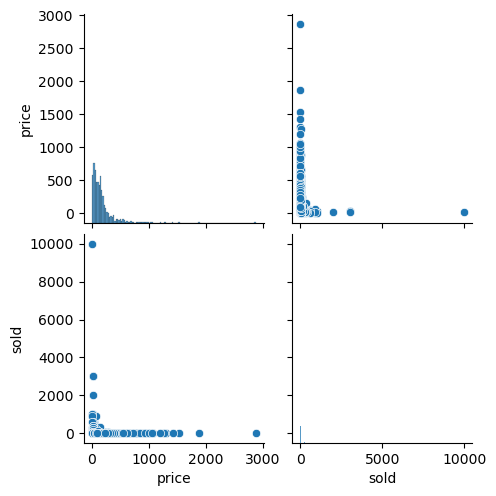

In [46]:
filtered_df = df[df['tagText'] == 'Free shipping']
# Create a pairplot including the 'sold' column and other relevant columns
sns.pairplot(filtered_df[['price', 'sold']])

In [48]:
le=LabelEncoder()
df['tagText']=le.fit_transform(df['tagText'])

In [50]:
df.head()

,productTitle,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,46.79,600,1
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,169.72,0,1
2,Desser For Bedroom With 7 Fabric Drawers Organ...,39.46,7,1
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",111.99,0,1
4,Small Unit Simple Computer Desk Household Wood...,21.37,1,1


In [52]:
df['tagText'].value_counts()

tagText
1    1880
2     111
0       9
Name: count, dtype: int64

In [56]:
# Split the dataset into features (X) and target (y)
X = df.drop('sold', axis=1)
y = df['sold']

In [58]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
print(X_train.shape, y_train.shape)
print(X_train.dtypes)

(1600, 3) (1600,)
productTitle     object
price           float64
tagText           int32
dtype: object


In [70]:
X_train['productTitle'] = le.fit_transform(X_train['productTitle'])

In [72]:
print(X_train.dtypes)
print(X_train.head())

productTitle      int32
price           float64
tagText           int32
dtype: object
     productTitle   price  tagText
968          1444  187.95        1
240           757   26.76        1
819           266   73.01        1
692           886    1.01        1
420          1007   11.37        1


In [108]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X_train)
x_scaled_test=scaler.transform(X_test)
print("Model training using linear regression")
regressor=LinearRegression()
reg=regressor.fit(x_scaled,y_train)
print("REG SCORE")
print(reg.score(x_scaled_test,y_test))
y_pred1=reg.predict(x_scaled_test)
print("MEAN SQUARED ERROR")
print(mean_squared_error(y_test,y_pred1))
print("R2 SCORE")
print(r2_score(y_test,y_pred1))

Model training using linear regression
REG SCORE
0.025765571459639536
MEAN SQUARED ERROR
5342.232974999348
R2 SCORE
0.025765571459639536


In [112]:
from sklearn.tree import DecisionTreeRegressor
print("Model training using DECISION TREE REGRESSOR")
clf = DecisionTreeRegressor()
clf.fit(x_scaled,y_train)
print("Model Training using decision tree")
print(clf.score(X_test,y_test))
y_pred2=clf.predict(X_test)
print("MEAN SQUARED ERROR")
print(mean_squared_error(y_test,y_pred2))
print("R2 SCORE")
print(r2_score(y_test,y_pred2))

Model training using DECISION TREE REGRESSOR
Model Training using decision tree
-1.851445863739352
MEAN SQUARED ERROR
15635.9575
R2 SCORE
-1.851445863739352


C:\Users\udayas\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\udayas\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [114]:
from sklearn.ensemble import RandomForestRegressor
print("Model training using RANDOM FOREST REGRESSOR")
clf=RandomForestRegressor()
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))
y_pred3=clf.predict(X_test)
print("MEAN SQUARED ERROR")
print(mean_squared_error(y_test,y_pred3))
print("R2 SCORE")
print(r2_score(y_test,y_pred3))

Model training using RANDOM FOREST REGRESSOR
-0.4865478267155361
MEAN SQUARED ERROR
8151.513215039653
R2 SCORE
-0.4865478267155361


In [116]:
from sklearn.svm import SVR
print("Model training using SVR")
clf=SVR()
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))
y_pred4=clf.predict(X_test)
print("MEAN SQUARED ERROR")
print(mean_squared_error(y_test,y_pred4))
print("R2 SCORE")
print(r2_score(y_test,y_pred4))

Model training using SVR
-0.03697382523535575
MEAN SQUARED ERROR
5686.265647256407
R2 SCORE
-0.03697382523535575


In [ ]:
# Linear regression has least mean squared error

In [120]:
print(type(y_pred1))
print(type(y_test))
print(type(X_test))
print(type(x_scaled))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [122]:
y_pred1=pd.Series(y_pred1,index=y_test.index,name='y_pred')
df_new=pd.concat([X_test,y_test.rename('y_test'),y_pred1],axis=1)
df_new.reset_index(drop=True,inplace=True)
df_new.head()

,productTitle,price,tagText,y_test,y_pred
0,18,86.35,1,1,17.782622
1,319,105.17,1,0,22.102347
2,254,51.27,2,6,11.135697
3,37,209.11,1,34,7.930693
4,104,467.23,1,3,-12.255309


In [126]:
df_new.to_csv('E-commerce Furniture Datset 2024 REPORT.csv',header=True,index=True)